In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Colocar na forma de um array 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

#Escalar os dados para média zero e variância unitária
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# São 0.7 pra treino e o resto pra teste e validação
#Separando já o resto de train e depois selecionando 20/30 = 0.66 aproximado separamos o dataset em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.66, random_state=42)

Highest accuracie from uniform:  (9, 0.8558823529411764)
Highest accuracie from distance:  (10, 0.8578431372549019)


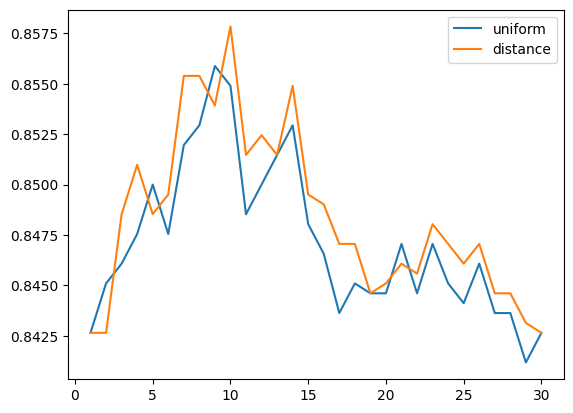

Best value of k: 10
Test accuracy: 0.8459595959595959


In [6]:
# Range das distancias
KVals = range(1, 31)
#Array das acuracias
accuracies = []
#Metricas de distancias
weight_function = ['uniform', 'distance']

#Array pecorrendo as  funções
for weight in weight_function:
  accuracies = []
  for k in KVals:
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k, weights=weight)
          model.fit(X_train, y_train)
          score = model.score(X_val, y_val)
          #print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append((k, score))

  print(f"Highest accuracie from {weight}: ", max(accuracies, key=lambda x: x[1]) )
  x, y = zip(*accuracies)
  plt.plot(x, y, label=weight)

plt.legend()
plt.show()
# Determine the k value that gives the highest validation accuracy
best_k = max(accuracies, key=lambda x: x[1])[0]
print("Best value of k:", max(accuracies, key=lambda x: x[1])[0])

# Train a KNN classifier with the best value of k and test it on the test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("Test accuracy:", test_score)